               INTRODUCTION
This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will not only apply the EDA techniques but also will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


1.1 BUSINESS UNDERSTANDING
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose we work for a consumer finance company which specialises in lending various types of loans to urban customers. We have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:




2.1 Read the data file
We will first read the application csv file .




In [ ]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

In [ ]:
# Filter out the warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Setting maximum rows and columns display size to 200 for better visibility of data

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [ ]:
# Read the application data file

import pandas as pd
df=pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

2.2 Inspect the data frame
In this section we will perform the below activities -

Inspect the application dataframe to understand the size of this dataset
Look at the column info such as data type
Summarise the numeric columns

In [ ]:
# Check the number  columns in the dataframe
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [ ]:
# Check the column-wise info of the dataframe
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [ ]:
# Check the summary for the numeric columns
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

**2.3 Data Cleaning & Imputation - Suggestions**
In this section we will perform data quality check by identifying missing values, incorrect data types etc. and by suggesting the best possible way to treat such data.

Check for any missing values and best possible metric to handle those missing values
1.Verify whether any column(s) has incorrect data type
2.For numerical columns, we will check for outliers
3.We will also perform binning of continuous variables



In [ ]:
# Check for missing values in percentage

round(100 *df.isnull().mean(),2)

,0
id,0.00
member_id,0.00
loan_amnt,0.00
funded_amnt,0.00
funded_amnt_inv,0.00
term,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00


In [ ]:
# Correct code to extract columns with more than 50% missing data

# Calculate missing data percentage per column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Round the percentages to 2 decimal places
missing_percent = missing_percent.round(2)

# Filter columns with more than 50% missing data
missing50 = list(filter(lambda x: x[1] > 50, missing_percent.items()))  # Use items() instead of iteritems()

# Extract the column names from the filtered list
cols_to_drop = [i[0] for i in missing50]

# Display the columns with more than 50% missing data
cols_to_drop


['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',


In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Identify columns with more than 50% missing values
cols_to_drop = missing_percentage[missing_percentage > 50].index.tolist()

# Drop these columns from the DataFrame
df.drop(cols_to_drop, axis=1, inplace=True)

# Check the shape of the DataFrame after dropping the columns
print(df.shape)


(39717, 54)


In [ ]:
# Check for % missing values for remaining columns

round(100 *df.isnull().sum() / len(df.index),2)

,0
id,0.00
member_id,0.00
loan_amnt,0.00
funded_amnt,0.00
funded_amnt_inv,0.00
term,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00


#There isonly this column desc with 32.59% data missing.


Scatter plot: Loan Amount vs Annual Income


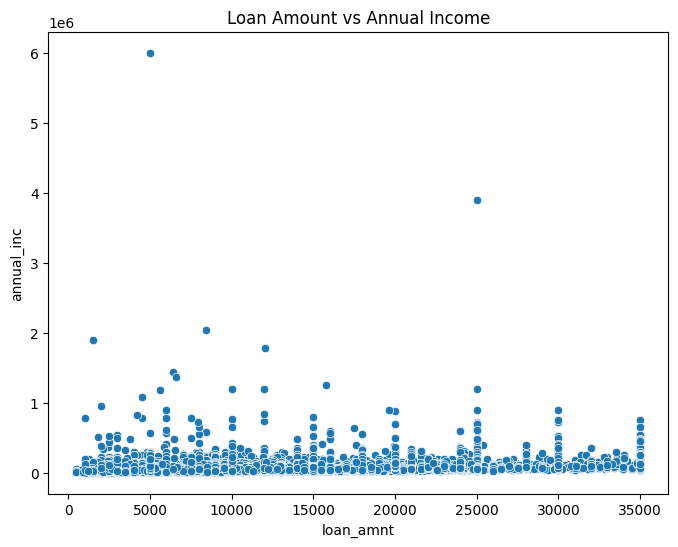

In [ ]:
print("\nScatter plot: Loan Amount vs Annual Income")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loan_amnt', y='annual_inc', data=df)
plt.title("Loan Amount vs Annual Income")
plt.show()


Loan Status Distribution:


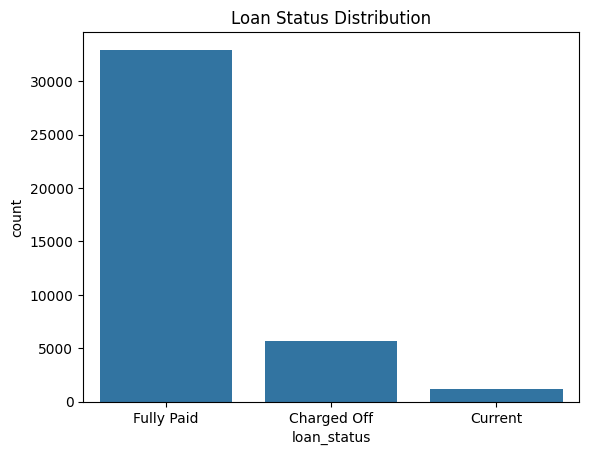

In [ ]:
# find loan status distribution
print("\nLoan Status Distribution:")
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution')
plt.show()



Boxplot: Loan Amount vs Loan Status


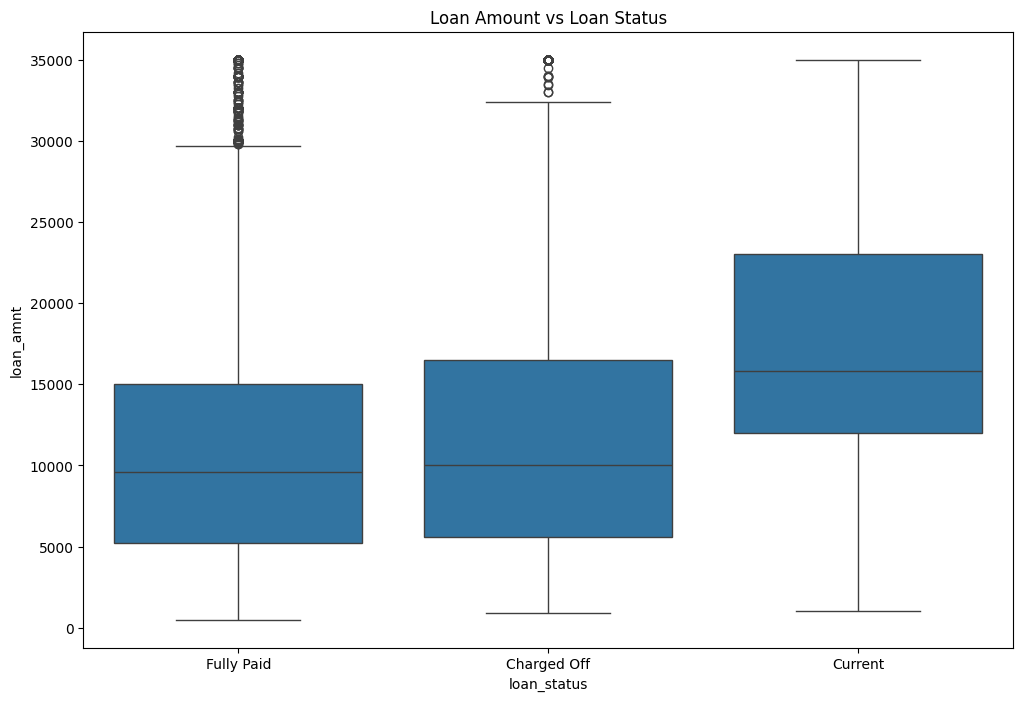

In [ ]:
# BOX PLOT loan amount vs loan status
print("\nBoxplot: Loan Amount vs Loan Status")
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title("Loan Amount vs Loan Status")
plt.show()

In [ ]:
print("\nLoan Status Value Counts:")
print(df['loan_status'].value_counts())


Loan Status Value Counts:
loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


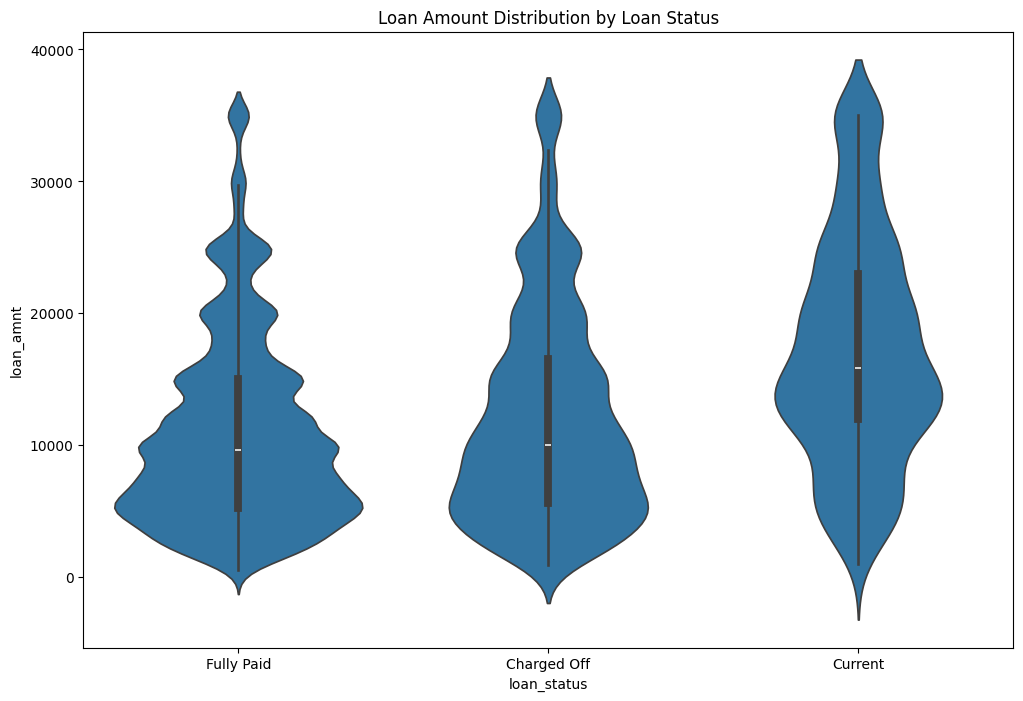

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Loan Amount Distribution by Loan Status')
plt.show()

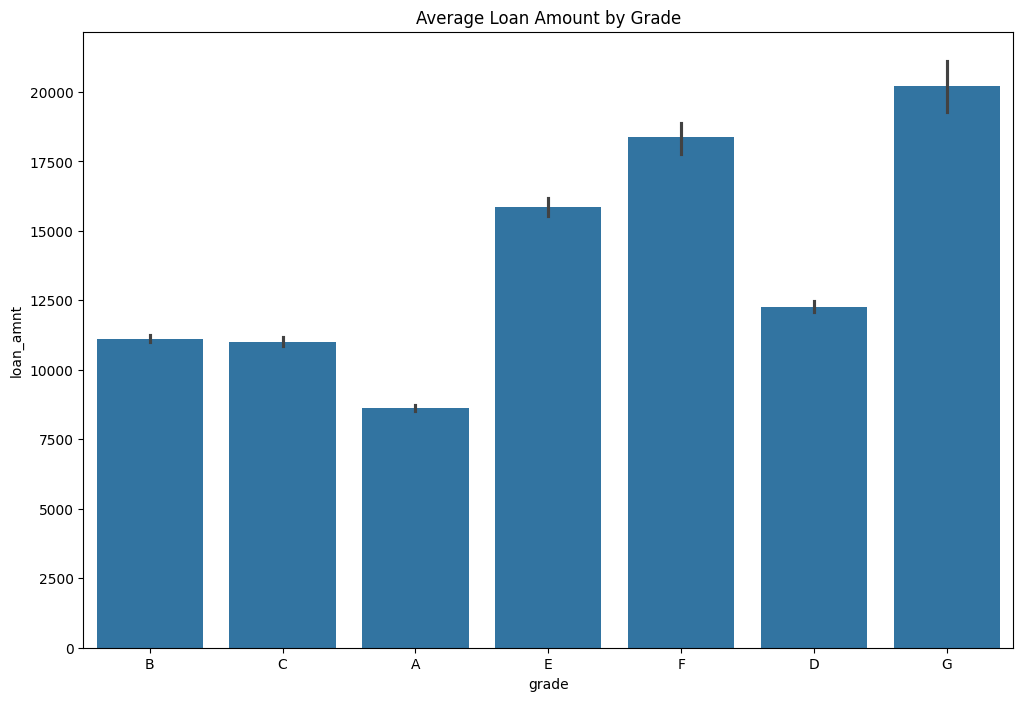

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='grade', y='loan_amnt', data=df)
plt.title('Average Loan Amount by Grade')
plt.show()

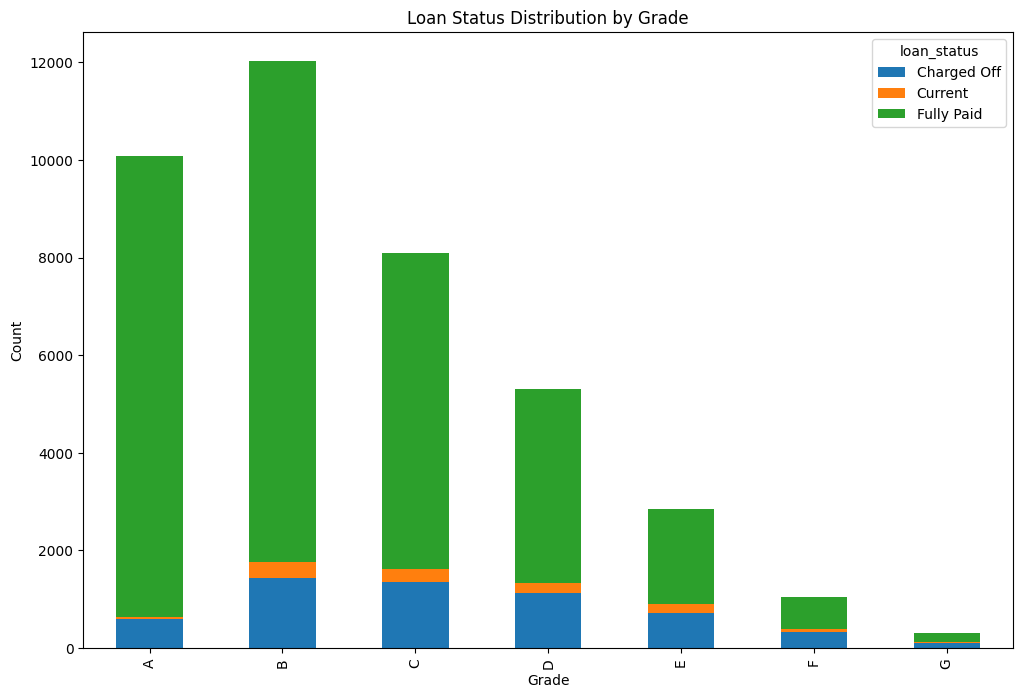

In [ ]:
loan_status_by_grade = pd.crosstab(df['grade'], df['loan_status'])
loan_status_by_grade.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Loan Status Distribution by Grade')
plt.ylabel('Count')
plt.xlabel('Grade')
plt.show()

In [ ]:
df['charged_off'] = df['loan_status'] == 'Charged Off'

# Group by grade and calculate the percentage of charged off loans
charged_off_by_grade = df.groupby('grade')['charged_off'].mean() * 100

# Display the result (percentage of charged off loans by grade)
charged_off_by_grade = charged_off_by_grade.sort_values(ascending=False)
print(charged_off_by_grade)

grade
G    31.962025
F    30.409914
E    25.158339
D    21.066516
C    16.633737
B    11.855241
A     5.969261
Name: charged_off, dtype: float64


In [ ]:
charged_off_loans = df[df['loan_status'] == 'Charged Off']

# Group by grade and count the number of charged off loans
charged_off_by_grade_count = charged_off_loans.groupby('grade').size()

# Display the result (total number of charged off loans by grade)
print(charged_off_by_grade_count)

grade
A     602
B    1425
C    1347
D    1118
E     715
F     319
G     101
dtype: int64


In [ ]:
import pandas as pd

# Load the loan data into a DataFrame (replace with your actual path)
loan = pd.read_csv('loan.csv')

# Filter charged-off loans from the original DataFrame
charged_off_loan = loan[loan['loan_status'] == 'Charged Off']

# Group by 'grade' and count the charged-off loans
charged_off_by_grade = charged_off_loan.groupby('grade').size()

# Group by 'grade' to count all loans (not just charged-off loans)
total_loan_by_grade = loan.groupby('grade').size()

# Calculate the percentage of charged-off loans for each grade
charged_off_percentage_by_grade = (charged_off_by_grade / total_loan_by_grade) * 100

# Set a threshold for risky grades (e.g., 20%)
threshold = 20

# Identify risky grades (those with a charged-off percentage greater than the threshold)
risky_grades = charged_off_percentage_by_grade[charged_off_percentage_by_grade > threshold]

# Print the risky grades
print("Risky Grades based on charged-off percentage:")
print(risky_grades)


Risky Grades based on charged-off percentage:
grade
D    21.066516
E    25.158339
F    30.409914
G    31.962025
dtype: float64


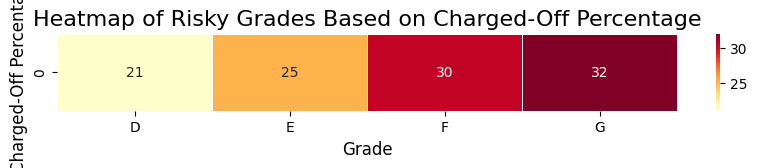

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is already loaded

# Filter rows where loan_status is 'Charged Off'
charged_off_loans = df[df['loan_status'] == 'Charged Off']

# Group by grade and count the total number of loans for each grade
total_loans_by_grade = df.groupby('grade').size()

# Group by grade and count the number of charged off loans for each grade
charged_off_by_grade = charged_off_loans.groupby('grade').size()

# Calculate the percentage of charged off loans for each grade
charged_off_percentage_by_grade = (charged_off_by_grade / total_loans_by_grade) * 100

# Set a threshold for risky grades (e.g., 20%)
threshold = 20

# Identify risky grades (those with a charged off percentage greater than the threshold)
risky_grades = charged_off_percentage_by_grade[charged_off_percentage_by_grade > threshold]

# Convert risky grades data to a DataFrame for heatmap visualization
# Reshape the data for better visualization (i.e., create a single-row DataFrame for the heatmap)
heatmap_data = pd.DataFrame(risky_grades).T  # Convert Series to DataFrame and transpose for the heatmap

# Plotting the heatmap
plt.figure(figsize=(10, 1))  # Set figure size (can adjust)
sns.heatmap(heatmap_data, annot=True, cmap="YlOrRd", cbar=True, linewidths=0.5)

# Add labels and title
plt.title("Heatmap of Risky Grades Based on Charged-Off Percentage", fontsize=16)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Charged-Off Percentage", fontsize=12)

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Assuming df is already loaded

# Filter rows where loan_status is 'Charged Off'
charged_off_loans = df[df['loan_status'] == 'Charged Off']

# Group by grade and count the total number of loans for each grade
total_loans_by_grade = df.groupby('grade').size()

# Group by grade and count the number of charged off loans for each grade
charged_off_by_grade = charged_off_loans.groupby('grade').size()
# Calculate the percentage of charged off loans for each grade
charged_off_percentage_by_grade = (charged_off_by_grade / total_loans_by_grade) * 100

# Set a threshold for safe grades (e.g., grades with charged off percentage < 20% are considered safe)
safe_threshold = 20

# Identify safe grades (those with a charged off percentage less than the threshold)
safe_grades = charged_off_percentage_by_grade[charged_off_percentage_by_grade < safe_threshold]

# Display the safe grades
print("Safe Grades based on charged off percentage:")
print(safe_grades)

Safe Grades based on charged off percentage:
grade
A     5.969261
B    11.855241
C    16.633737
dtype: float64


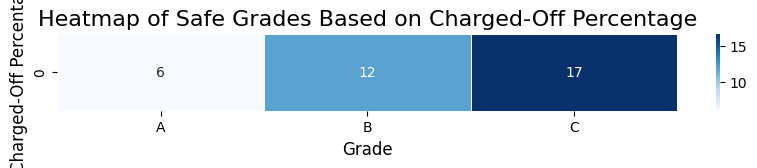

In [ ]:
# Convert safe grades data to a DataFrame for heatmap visualization
heatmap_data = pd.DataFrame(safe_grades).T  # Convert Series to DataFrame and transpose for heatmap

# Plotting the heatmap
plt.figure(figsize=(10, 1))  # Set figure size (can adjust)
sns.heatmap(heatmap_data, annot=True, cmap="Blues", cbar=True, linewidths=0.5)

# Add labels and title
plt.title("Heatmap of Safe Grades Based on Charged-Off Percentage", fontsize=16)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Charged-Off Percentage", fontsize=12)

# Show the plot
plt.show()


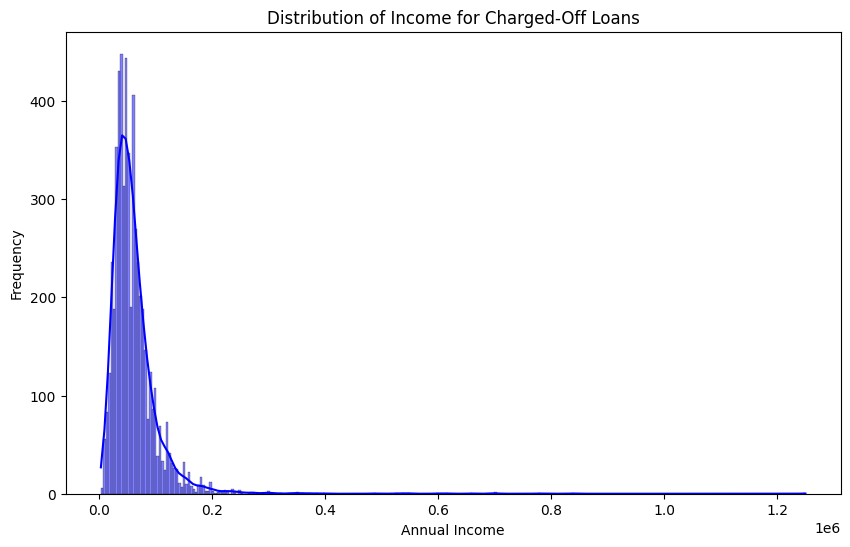

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(charged_off_loans['annual_inc'], kde=True, color='blue')
plt.title('Distribution of Income for Charged-Off Loans')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()


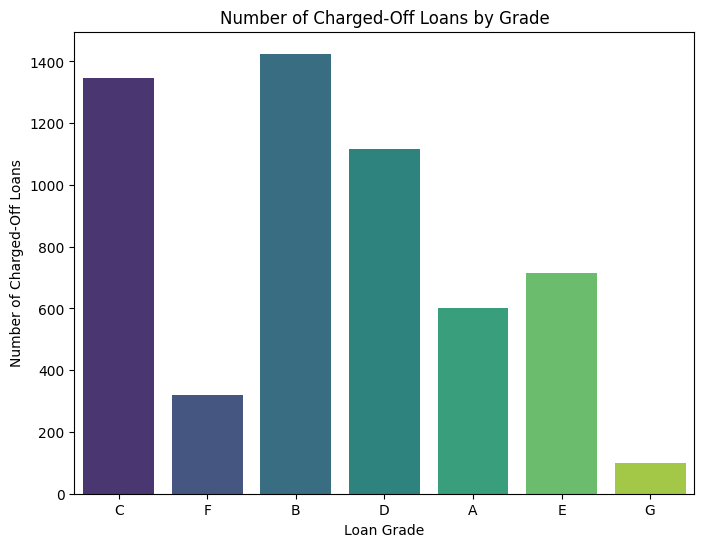

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='grade', data=charged_off_loans, palette='viridis')
plt.title("Number of Charged-Off Loans by Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Number of Charged-Off Loans")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Prepare the dataset (example columns)
X = df[['loan_amnt', 'annual_inc', 'dti', 'int_rate', 'grade']]  # Features
y = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)  # Target: 1 for Charged Off, 0 for Paid

# Convert categorical variables into numeric using encoding
X = pd.get_dummies(X, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      1.00      0.93      6850
           1       0.00      0.00      0.00      1094

    accuracy                           0.86      7944
   macro avg       0.43      0.50      0.46      7944
weighted avg       0.74      0.86      0.80      7944



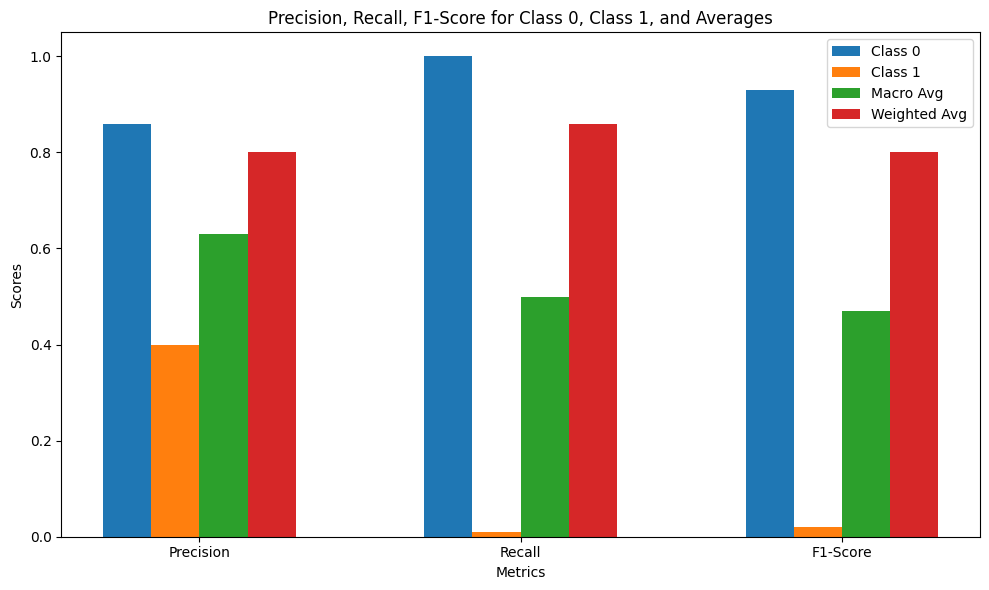

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
metrics = ['Precision', 'Recall', 'F1-Score']
class_0 = [0.86, 1.00, 0.93]
class_1 = [0.40, 0.01, 0.02]
macro_avg = [0.63, 0.50, 0.47]
weighted_avg = [0.80, 0.86, 0.80]

# X-axis positions for the bars
x = np.arange(len(metrics))
width = 0.15  # Bar width

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars for each class and average
ax.bar(x - width*1.5, class_0, width, label='Class 0')
ax.bar(x - width/2, class_1, width, label='Class 1')
ax.bar(x + width/2, macro_avg, width, label='Macro Avg')
ax.bar(x + width*1.5, weighted_avg, width, label='Weighted Avg')

# Adding labels, title, and ticks
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, F1-Score for Class 0, Class 1, and Averages')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


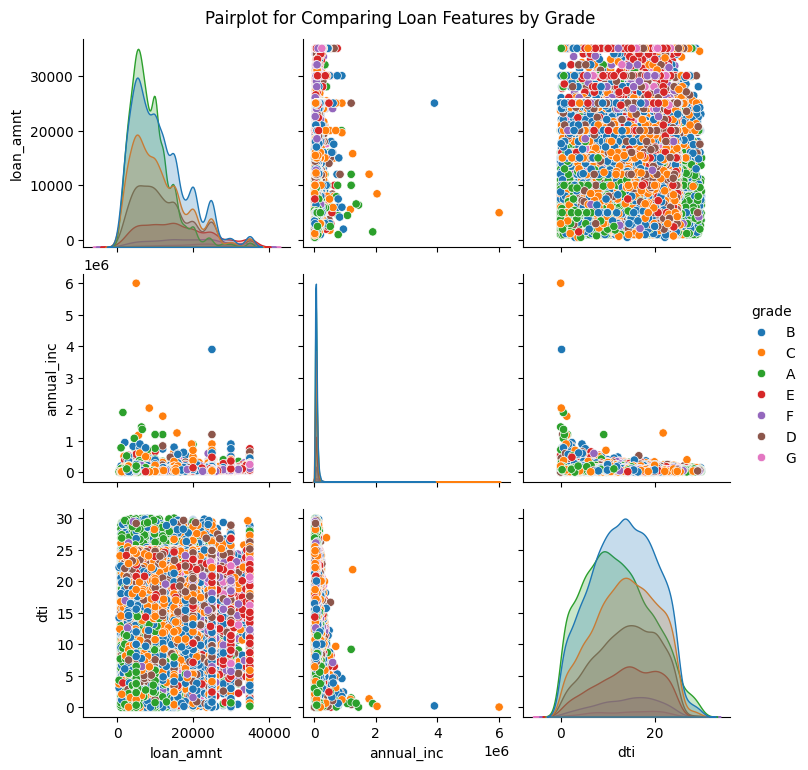

In [ ]:
# Select some relevant features for pairplot
selected_columns = ['loan_amnt', 'annual_inc', 'dti', 'int_rate', 'grade']
sns.pairplot(df[selected_columns], hue='grade', diag_kind='kde')

plt.suptitle('Pairplot for Comparing Loan Features by Grade', y=1.02)
plt.show()


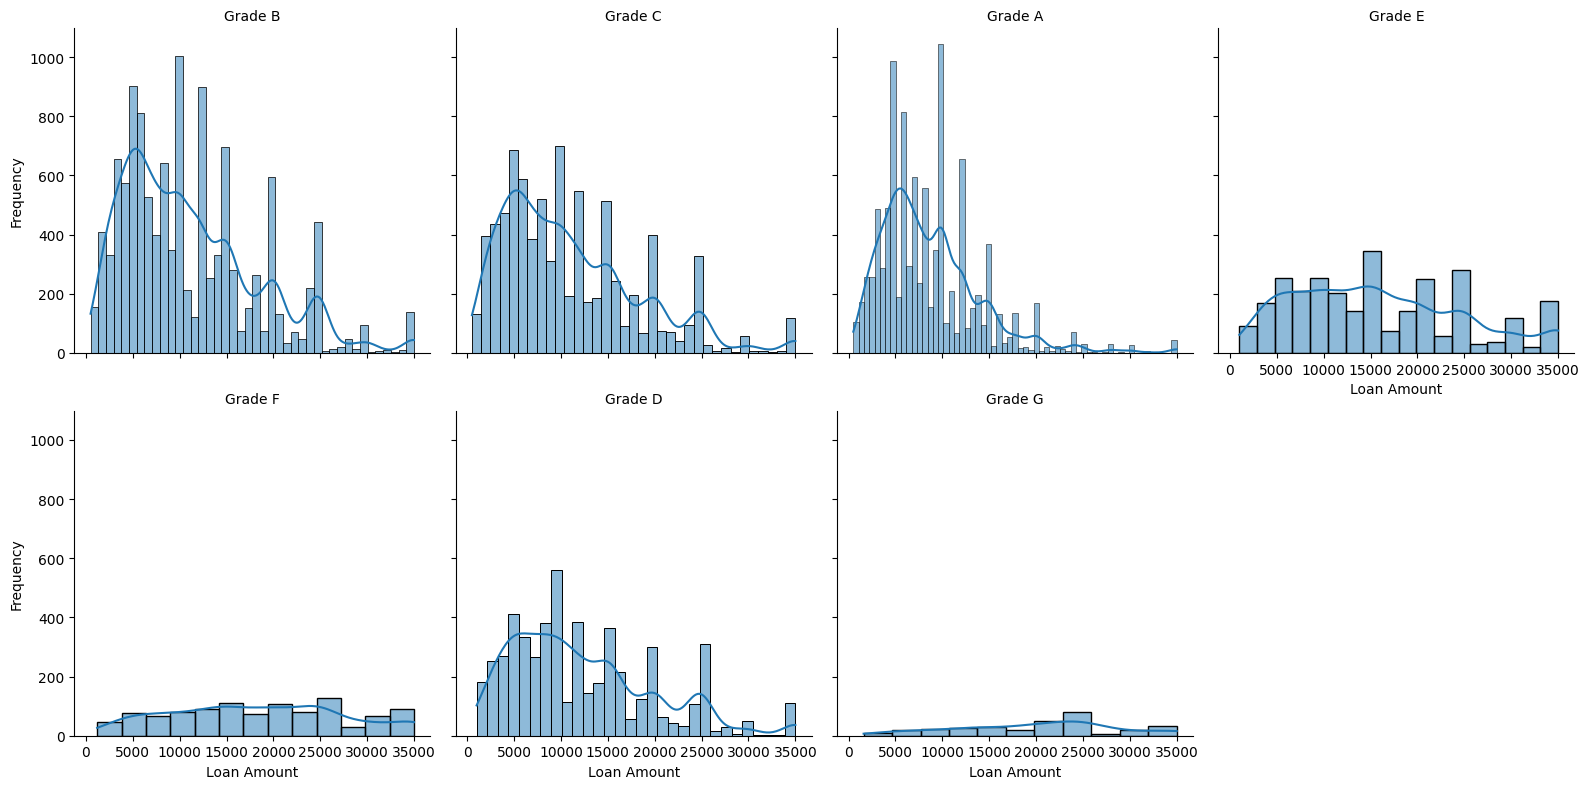

In [ ]:
g = sns.FacetGrid(df, col="grade", col_wrap=4, height=4)
g.map(sns.histplot, 'loan_amnt', kde=True)

g.set_axis_labels('Loan Amount', 'Frequency')
g.set_titles('Grade {col_name}')
g.tight_layout()
plt.show()

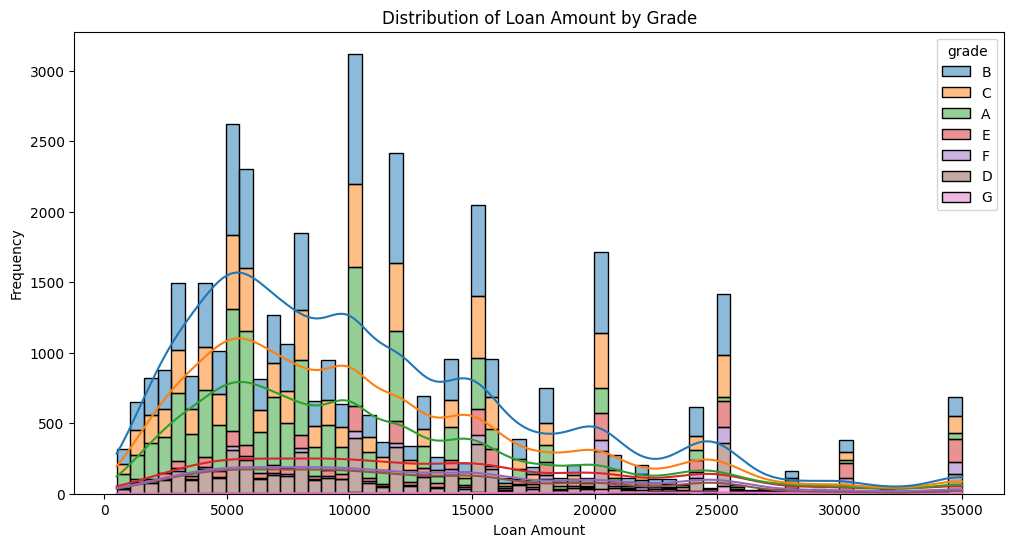

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset: Assuming we have 'loan_amnt' and 'grade' columns
plt.figure(figsize=(12, 6))

# Distribution plot comparing loan amount by grade
sns.histplot(df, x='loan_amnt', hue='grade', multiple='stack', kde=True)

plt.title('Distribution of Loan Amount by Grade')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


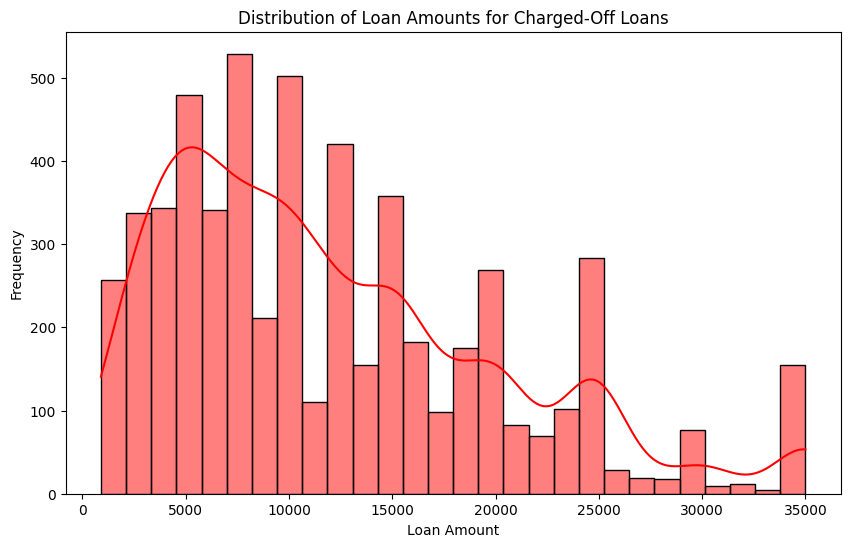

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(charged_off_loans['loan_amnt'], kde=True, color='red')
plt.title('Distribution of Loan Amounts for Charged-Off Loans')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


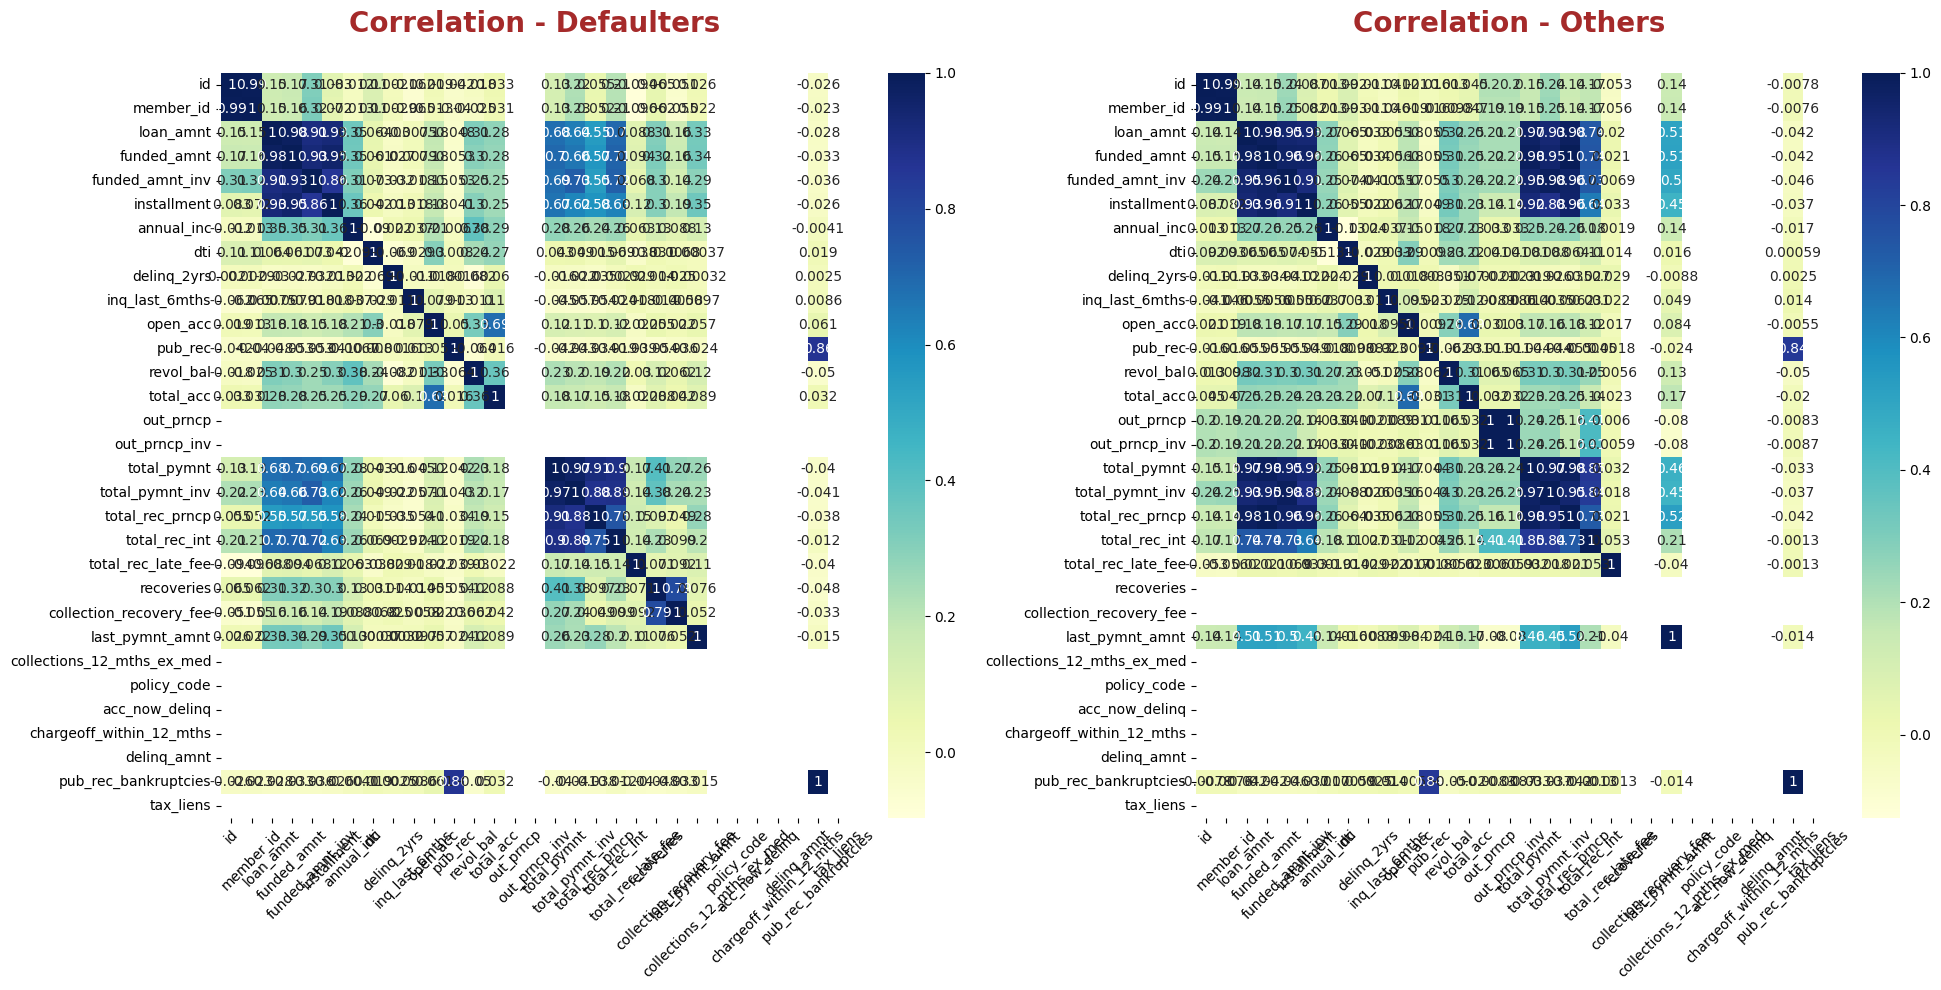

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Filter the data for 'Defaulters' and 'Others'
df_defaulters = df[df['loan_status'] == 'Charged Off']
df_others = df[df['loan_status'] != 'Charged Off']

# Select only numeric columns for correlation calculation
df_defaulters_numeric = df_defaulters.select_dtypes(include=['number', 'float64', 'int64'])
df_others_numeric = df_others.select_dtypes(include=['number', 'float64', 'int64'])

# Calculate the correlation matrices for both subsets
corr_df1 = df_defaulters_numeric.corr()  # Correlation matrix for Defaulters
corr_df0 = df_others_numeric.corr()  # Correlation matrix for Others

# Plotting the heatmaps
plt.figure(figsize=[20, 10])

# Plot the first heatmap for 'Defaulters' (corr_df1)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(corr_df1, cmap="YlGnBu", annot=True)
plt.title('Correlation - Defaulters\n', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'Brown'})
plt.xticks(rotation=45)

# Plot the second heatmap for 'Others' (corr_df0)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.heatmap(corr_df0, cmap="YlGnBu", annot=True)
plt.title('Correlation - Others\n', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'Brown'})
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


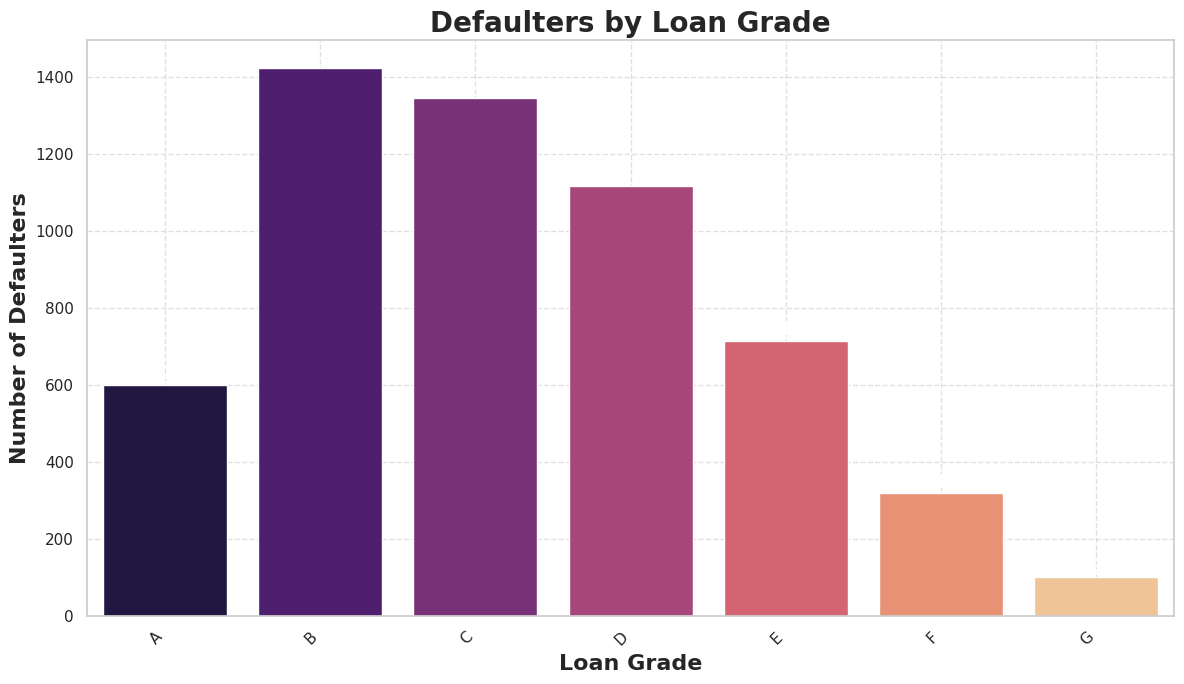

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it's already loaded

# Filter rows where loan_status is 'Charged Off' (defaulters)
df_defaulters = df[df['loan_status'] == 'Charged Off']

# Count defaulters by grade
grade_defaulters = df_defaulters.groupby('grade').size().reset_index(name='DEFAULTERS')

# Set the style of the plot
sns.set(style="whitegrid")

# Create a Seaborn bar plot
plt.figure(figsize=(12, 7))  # Adjust figure size for better readability
bar_plot = sns.barplot(x='grade', y='DEFAULTERS', data=grade_defaulters, palette="magma")

# Add annotations on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}',  # Display the count of defaulters
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      fontsize=14, color='white', fontweight='bold',
                      xytext=(0, 8), textcoords='offset points')

# Add labels and title
plt.xlabel('Loan Grade', fontsize=16, fontweight='bold')
plt.ylabel('Number of Defaulters', fontsize=16, fontweight='bold')
plt.title('Defaulters by Loan Grade', fontsize=20, fontweight='bold')

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
